# Load Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# Load Data

In [45]:
noise_type='pareto'
p=1.1
scale = 1.0
mean = 1.0
samples=100000
n_seeds=100

sample_mean_error_list = []
trunc_mean_error_list = []
median_mean_error_list = []
catoni_mean_error_list = []
weakly_robust_mean_error_list = []

for seed in range(1,n_seeds):
    filename = './estimation_results/{:}-p{:.2f}-s{:.2f}-m{:.2f}-size{:d}-seed{:d}.npy'.format(noise_type,p,scale,mean,samples,seed)
    with open(filename,'rb') as f:
        data_for_seed = np.load(f)
        sample_mean_error_list.append(data_for_seed['sample_mean'])
        trunc_mean_error_list.append(data_for_seed['trunc_mean'])
        median_mean_error_list.append(data_for_seed['median_mean'])
        catoni_mean_error_list.append(data_for_seed['catoni_mean'])
        weakly_robust_mean_error_list.append(data_for_seed['weakly_robust_mean'])

# Plot Results

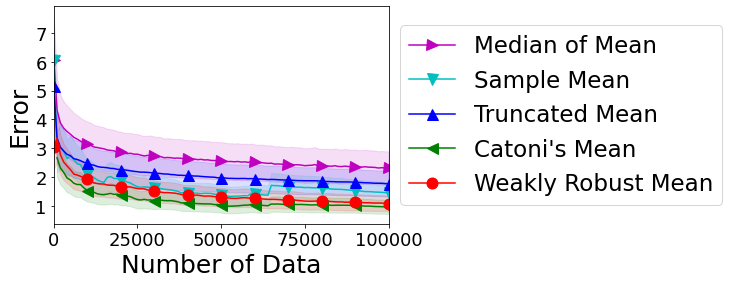

In [46]:
def linearplot_with_confidence(x_list, error_list, label, marker="", color='r'):
    mean_list = np.mean(error_list,axis=0)
    std_list = np.mean(error_list,axis=0)
    a = 0.25
    plt.fill_between(x_list,mean_list-a*std_list,mean_list+a*std_list,alpha=0.13, color=color)
    plt.plot(x_list,mean_list,label=label,marker=marker, ms=11, c=color, markevery=10)

x_list = 1000*np.arange(len(median_mean_error_list[0]))
linearplot_with_confidence(x_list, median_mean_error_list, "Median of Mean",">", "m")
linearplot_with_confidence(x_list, sample_mean_error_list, "Sample Mean", "v", "c")
linearplot_with_confidence(x_list, trunc_mean_error_list, "Truncated Mean", "^", "b")
linearplot_with_confidence(x_list, catoni_mean_error_list, "Catoni's Mean","<", "g")
linearplot_with_confidence(x_list, weakly_robust_mean_error_list, "Weakly Robust Mean","o", "r")

# plt.xscale("log")
plt.xlim([np.min(x_list),np.max(x_list)])
# plt.ylim([0.05,0.25]) # 1.5 1.0
# plt.ylim([0.01,0.05]) # 1.9 1.0
# plt.ylim([0.1,0.7]) # 1.2 0.5
# plt.ylim([0.025,0.16]) #1.2 0.1
# plt.ylim([0.3,1.4]) #1.2 1.0
# plt.ylim([0.1,0.4]) #1.1 0.1
# plt.ylim([0.3,1.4]) #1.1 0.5
# plt.ylim([1.0,4.0]) #1.1 1.0
plt.xlabel("Number of Data",fontsize=25)
plt.ylabel("Error",fontsize=25)

plt.xticks(x_list[::25],x_list[::25],fontsize=18)
plt.yticks(fontsize=18)
# y_ticks,_=plt.yticks()
# plt.yticks(y_ticks[::2], ["{:.2f}".format(tick) for tick in y_ticks[::2]],fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size' : 23})
# print(plt.yticks())
plt.show()